# Eigen Vectors and Values ... what are they?

This notebook is designed to cover the basic visualizations of what eigen vectors and values are and what aspects of them are important. We'll attempt to build up your visualization of them, appreciation for why big ones are more important than small ones, and understand what the null space is.

These should form the foundation for an appreciation of the transformations used in PCA, LDA, and other high dimensional linear algebra techniques.

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
import random

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [62]:
def generate_points(n, d, valid_point=lambda p: True):
    """Generates n points each of which lives in d dimensions. Filters points
    by the optional valid_point argument. All points live in the unit cube
    
    Args:
        n: int, number of points to generate
        d: int, number of dimensions of the point
        
    Kwargs:
        valid_point: function, returns bool of whether or not to include the points
        
    Returns:
        list of np.array points
    """
    points = []
    while len(points) < n:
        candidate = np.array([(random.random() - 0.5) * 2 for i in range(d)])
        if valid_point(candidate):
            points.append(candidate)

    return points


def plot_2d_points(points):
    """Plots 2d points
    """
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111)
    ax.plot([i for (i, j) in points],
            [j for (i, j) in points],
            'bd'
           )
    ax.set_title('Raw Points No Transformation', size='xx-large')
    fig.show()

    
def transform_and_plot_points(points, m, title):
    """
    """
    print('Transforming points with matrix:\n', m)
    transformed_points = [m * p.reshape((2, 1)) for p in points]
    
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111)
    for (before, after) in zip(points, transformed_points):
        x = [before[0], after[0]]
        y = [before[1], after[1]]
        ax.plot(x, y, 'y--'
               )
        ax.plot(x[0], y[0], 'gd')
        ax.plot(x[1], y[1], 'rd')
        
    # Trick plt for a legend by replotting last few points
    ax.plot(x[0], y[0], 'gd', label='Before')
    ax.plot(x[1], y[1], 'rd', label='After')
        
    ax.set_title(title, size='xx-large')
    ax.legend(loc='bottom right')
    plt.axes().set_aspect('equal', 'datalim')
    fig.show()

    
def print_eigen_vectors_values(m):
    """
    """
    (values, vectors) = LA.eig(m)
    
    print("""
    Eigen Values:
    {values}
    
    Eigen Vectors:
    {vectors}
    """.format(**locals()))

## Let's see a simple transformation in action

Transforming points with matrix:
 [[ 1.1  0. ]
 [ 0.   1.1]]


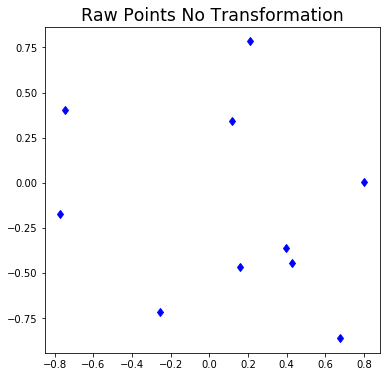

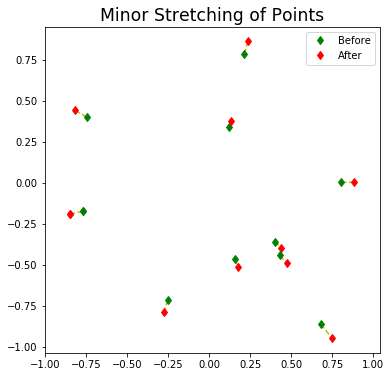

In [57]:
# Generate some points
points = generate_points(10, 2)

# Visualize those points
plot_2d_points(points)

# Create Minor Stretch Transformation
m = np.matrix([[1.1, 0], [0, 1.1]])

# Plot How Minot Stretch Transforms Points
transform_and_plot_points(points, m, 'Minor Stretching of Points')

## What are the Eigen Vectors and Values of Minor Stretching?

In [63]:
# Create Minor Stretch Transformation
m = np.matrix([[1.1, 0], [0, 1.1]])
print_eigen_vectors_values(m)


    Eigen Values:
    [ 1.1  1.1]
    
    Eigen Vectors:
    [[ 1.  0.]
 [ 0.  1.]]
    


So the matrix of eigenvectors is just the identity matrix, so no rotation is occuring. The eigen values however, tell us vectors are being stretched equally along each eigen vector.

## Let's try a major stretch

Transforming points with matrix:
 [[ 10.    0. ]
 [  0.    1.1]]

    Eigen Values:
    [ 10.    1.1]
    
    Eigen Vectors:
    [[ 1.  0.]
 [ 0.  1.]]
    


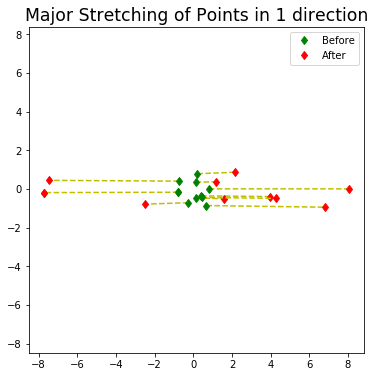

In [65]:
# Create Minor Stretch Transformation
m = np.matrix([[10, 0], [0, 1.1]])

# Plot How Minot Stretch Transforms Points
transform_and_plot_points(points, m, 'Major Stretching of Points in 1 direction')

# And the corresponding eignvectors and values
print_eigen_vectors_values(m)

Transforming points with matrix:
 [[10  0]
 [ 0  5]]

    Eigen Values:
    [ 10.   5.]
    
    Eigen Vectors:
    [[ 1.  0.]
 [ 0.  1.]]
    


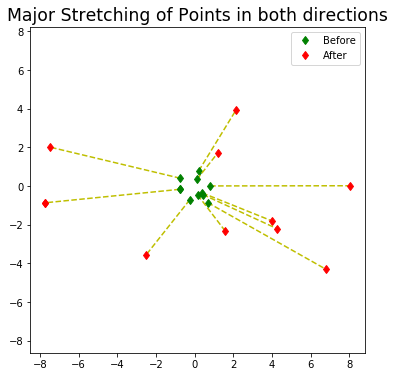

In [66]:
# Create Major Stretch Transformation
m = np.matrix([[10, 0], [0, 5]])

# Plot How Minot Stretch Transforms Points
transform_and_plot_points(points, m, 'Major Stretching of Points in both directions')

# And the corresponding eignvectors and values
print_eigen_vectors_values(m)

## Null Space
Let's build up one more concept. The null space.

Transforming points with matrix:
 [[ 1.  0.]
 [ 0.  0.]]
Transforming points with matrix:
 [[ 0.  0.]
 [ 0.  1.]]


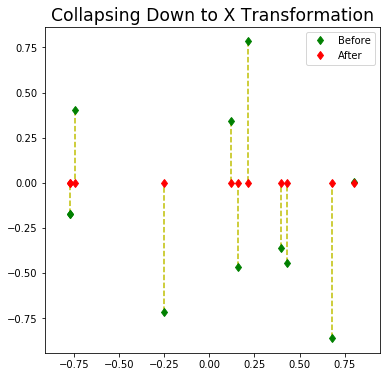

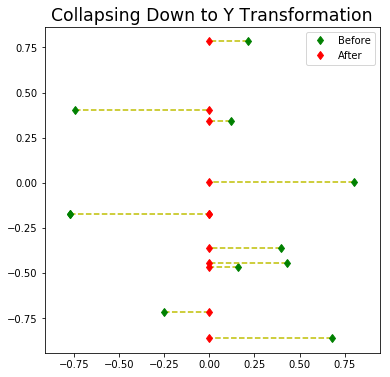

In [67]:
# Create Collapse Down to X Transformation
m = np.matrix([[1, 0], [0, 0.0]])

# Plot How Minot Stretch Transforms Points
transform_and_plot_points(points, m, 'Collapsing Down to X Transformation')

# Create Collapse Down to Y Transformation
m = np.matrix([[0, 0], [0, 1.0]])

# Plot How Minot Stretch Transforms Points
transform_and_plot_points(points, m, 'Collapsing Down to Y Transformation')

In the above transformations all transformed points could be represented in 1 dimension. Which, means we must be loosing some information. Let's take a look at what type of information we're loosing.

Transforming points with matrix:
 [[ 1.  0.]
 [ 0.  0.]]
Transforming points with matrix:
 [[ 0.  0.]
 [ 0.  1.]]


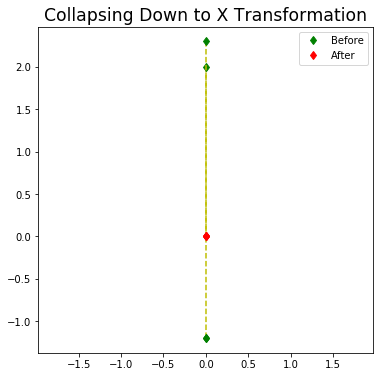

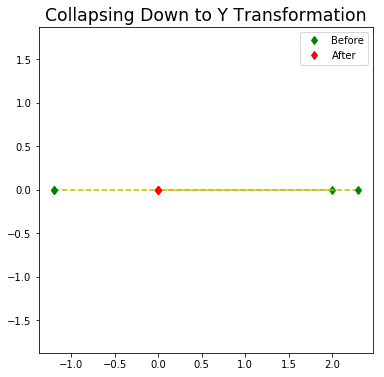

In [71]:
x_points = [np.array([2, 0]),
            np.array([2.3, 0]),
            np.array([-1.2, 0])
           ]

y_points = [np.array([0, 2]),
            np.array([0, 2.3]),
            np.array([0, -1.2])
           ]

# Create Collapse Down to X Transformation
m = np.matrix([[1, 0], [0, 0.0]])

# Plot How Minot Stretch Transforms Points
transform_and_plot_points(y_points, m, 'Collapsing Down to X Transformation')

# Create Collapse Down to Y Transformation
m = np.matrix([[0, 0], [0, 1.0]])

# Plot How Minot Stretch Transforms Points
transform_and_plot_points(x_points, m, 'Collapsing Down to Y Transformation')

## Null Space

Note all points above collapsed into the point (0, 0). They went into the black hole of the null space. Why is it a black hole? Because those points can never be reconstructed. Unlike the stretch transformations above that can be.

Transforming points with matrix:
 [[ 1.1  0. ]
 [ 0.   1.1]]
Transforming points with matrix:
 [[ 1.1  0. ]
 [ 0.   1.1]]


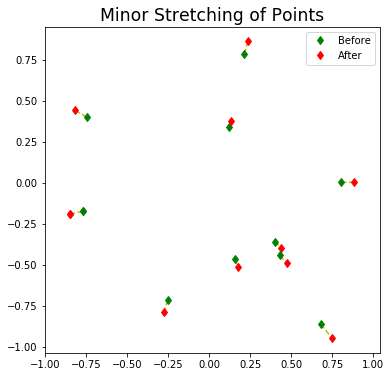

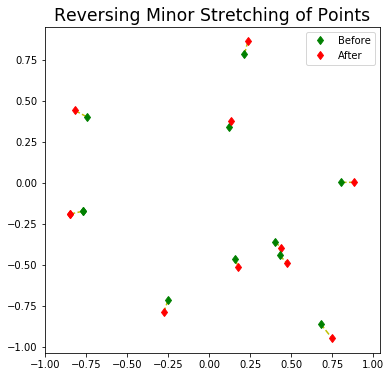

In [72]:
# Create Minor Stretch Transformation
m = np.matrix([[1.1, 0], [0, 1.1]])
transform_and_plot_points(points, m, 'Minor Stretching of Points')

# Create the Inverse of the Minor Stretch Transformation
m_inv = np.matrix([[1/1.1, 0], [0, 1/1.1]])
transform_and_plot_points(points, m, 'Reversing Minor Stretching of Points')

## Meaning of Null Space

Often times you'll hear of the dimension of the Null Space - this is representative of how much of the space is being wiped out.

# Let's do a Rotation Matrix

\begin{bmatrix}\cos \theta &-\sin \theta \\\sin \theta &\cos \theta \\\end{bmatrix}


Transforming points with matrix:
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Eigen Vectors and Values for Counter Clockwise

    Eigen Values:
    [ 0.70710678+0.70710678j  0.70710678-0.70710678j]
    
    Eigen Vectors:
    [[ 0.70710678+0.j          0.70710678-0.j        ]
 [ 0.00000000-0.70710678j  0.00000000+0.70710678j]]
    
Transforming points with matrix:
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
Eigen Vectors and Values for Clockwise

    Eigen Values:
    [ 0.70710678+0.70710678j  0.70710678-0.70710678j]
    
    Eigen Vectors:
    [[ 0.70710678+0.j          0.70710678-0.j        ]
 [ 0.00000000+0.70710678j  0.00000000-0.70710678j]]
    


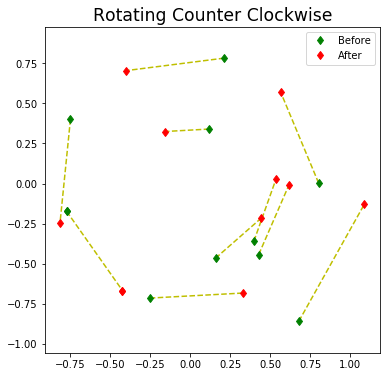

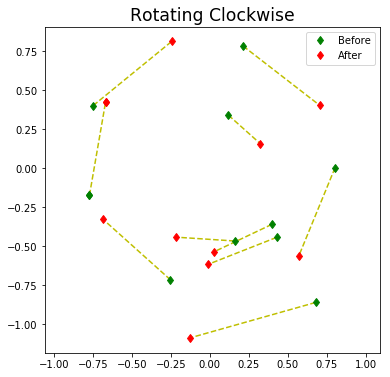

In [78]:
# Rotating Clockwise
import math
theta = math.pi / 4.0

# Rotation Counter Clockwise
m = np.matrix([[math.cos(theta), -1 * math.sin(theta)],
               [math.sin(theta), math.cos(theta)]])
transform_and_plot_points(points, m, 'Rotating Counter Clockwise')

print('Eigen Vectors and Values for Counter Clockwise')
print_eigen_vectors_values(m)

# Rotating Clockwise
theta = -1 * math.pi / 4.0
m = np.matrix([[math.cos(theta), -1 * math.sin(theta)],
               [math.sin(theta), math.cos(theta)]])
transform_and_plot_points(points, m, 'Rotating Clockwise')

print('Eigen Vectors and Values for Clockwise')
print_eigen_vectors_values(m)

Note the Eigen Values are of the same magnitude, saying the two eigen vectors have equal weighting on what is happening in the space.

Let's try a variation of rotate and stretch! How will that change the eigen vectors.

Transforming points with matrix:
 [[ 7.07106781  0.70710678]
 [-0.70710678  0.70710678]]
Eigen Vectors and Values for Clockwise

    Eigen Values:
    [ 6.99150571  0.78666889]
    
    Eigen Vectors:
    [[ 0.99372935 -0.11181225]
 [-0.11181225  0.99372935]]
    


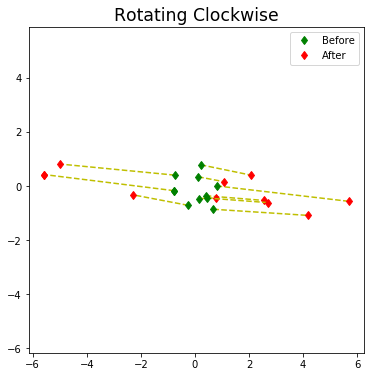

In [80]:
# Rotating Clockwise and Stretching
theta = -1 * math.pi / 4.0
m = np.matrix([[10 * math.cos(theta), -1 * math.sin(theta)],
               [math.sin(theta), math.cos(theta)]])
transform_and_plot_points(points, m, 'Rotating Clockwise')

print('Eigen Vectors and Values for Clockwise')
print_eigen_vectors_values(m)